In [42]:
import sympy 
import numpy

from matplotlib import pyplot
%matplotlib inline

z = sympy.Symbol('z', real=True)
logistic=1/(1+sympy.exp(-z))
logistic

1/(1 + exp(-z))

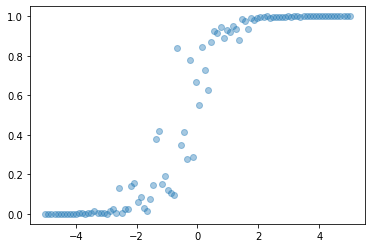

In [3]:
x_data= numpy.linspace(-5, 5 , 100)
w=2
b=1
numpy.random.seed(0)
z_data= w*x_data+b+numpy.random.normal(size=len(x_data))
y_data = 1/(1+numpy.exp(-z_data))

pyplot.scatter(x_data, y_data, alpha=0.4)

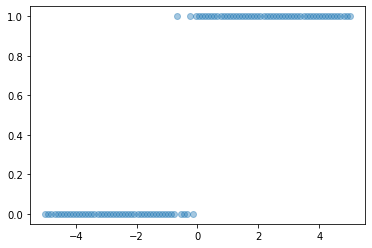

In [4]:
y_data=numpy.where(y_data>=0.5,1,0)
pyplot.scatter(x_data, y_data, alpha=0.4)

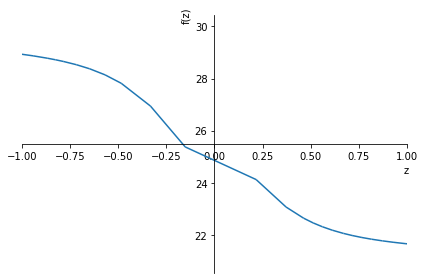

In [6]:
badloss = (2 - 1/(1+sympy.exp(-z)))**2 +\
          (-1 -1/(1+sympy.exp(-20*z)))**2 +\
          (5 -1/(1+sympy.exp(-5*z)))**2
sympy.plotting.plot(badloss, xlim=(-1,1))

[2] multiple logistic의 cost function

In [7]:
lprime=logistic.diff(z)
lprime

exp(-z)/(1 + exp(-z))**2

In [9]:
a, y = sympy.symbols('a y', real=True)
dLda=(y-a)/a/(1-a)
dLda

(-a + y)/(a*(1 - a))

In [46]:
L=sympy.integrate(dLda, a)
L 

y*log(a) + (1 - y)*log(a + (1 - 2*y)/(2*y - 1))

In [47]:
sympy.simplify(L)

y*log(a) - (y - 1)*log(a - 1)

In [48]:
L=-y*sympy.log(a) + (y-1)*sympy.log(1-a)
L

-y*log(a) + (y - 1)*log(1 - a)

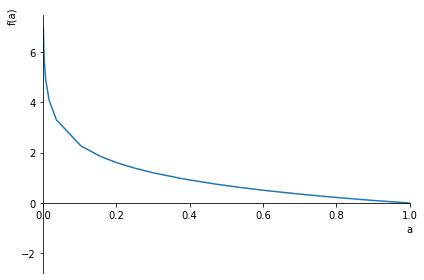

In [50]:
sympy.plotting.plot(-sympy.log(a), xlim=(0,1))


[3]Logistic regression의 gradient descent 값
=>autograd로 구함

In [51]:
logistic

1/(1 + exp(-z))

In [52]:
w, b, x, y = sympy.symbols('w b x y')
logistic = 1/(1+ sympy.exp(-w*x-b)) # redefined with the composition

Loss = -y*sympy.log(logistic) - (1-y)*sympy.log(1-logistic)
Loss

-y*log(1/(exp(-b - w*x) + 1)) - (1 - y)*log(1 - 1/(exp(-b - w*x) + 1))

In [53]:
from autograd import numpy
from autograd import grad

def logistic(z):
    return 1 / (1 + numpy.exp(-z))
    
def logistic_model(params, x):
    w = params[0]
    b = params[1]
    z = w * x + b
    y = logistic(z)
    return y

def log_loss(params, model, x, y):
    y_pred = model(params, x)
    return -numpy.mean(y * numpy.log(y_pred) + (1-y) * numpy.log(1 - y_pred)) #왜 sum 안하지?  #loss function이 cost function이랑 동의어임?
    

In [54]:
gradient = grad(log_loss) #import grad의 function을 쓴건가..?

In [34]:
type(gradient)

function

In [55]:
numpy.random.seed(0)
params=numpy.random.rand(2)
print(params)



[0.5488135  0.71518937]


In [56]:
gradient(params, logistic_model, x_data, y_data)

array([-0.42734877,  0.08274066])

Optimized value of w is 2.73095033006471 vs. true value: 2
Optimized value of b is 0.6974552315981599 vs. true value: 1
Exited after 5000 iterations


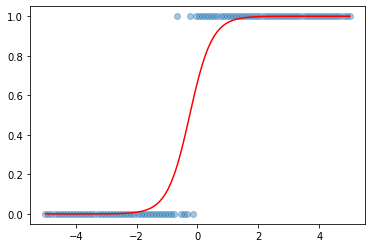

In [57]:
max_iter=5000
i=0
descent=numpy.ones(len(params))

while numpy.linalg.norm(descent) > 0.001 and i < max_iter:
  descent = gradient(params,logistic_model, x_data, y_data)
  params = params - descent * 0.01
  i += 1 

print('Optimized value of w is {} vs. true value: 2'.format(params[0]))
print('Optimized value of b is {} vs. true value: 1'.format(params[1]))
print('Exited after {} iterations'.format(i))


pyplot.scatter(x_data, y_data, alpha=0.4)
pyplot.plot(x_data, logistic_model(params, x_data), '-r');  

In [60]:
def decision_boundary(y):
  return 1 if y >= 0.5 else 0
decision_boundary=numpy.vectorize(decision_boundary)


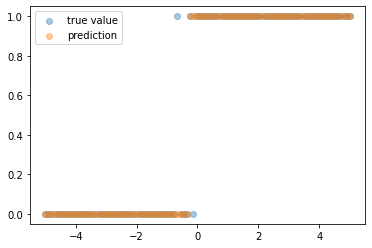

In [61]:
def classify(predictions):
  return decision_boundary(predictions).flatten()

pyplot.scatter(x_data, y_data, alpha=0.4, label='true value')
pyplot.scatter(x_data, classify(logistic_model(params, x_data)),alpha=0.4, label='prediction')
pyplot.legend();